In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Load the dataset
df = pd.read_csv('/Users/mohanadalkadri/Desktop/insurance.csv')

# Display the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check the number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1335.0,30.661423,6.101038,15.9600,26.30250,30.400,34.687500,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:

smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']


print(f'Smokers: {len(smokers)}, Non-Smokers: {len(non_smokers)}')

Smokers: 274, Non-Smokers: 1064


In [8]:
# Check the balance of the dataset
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

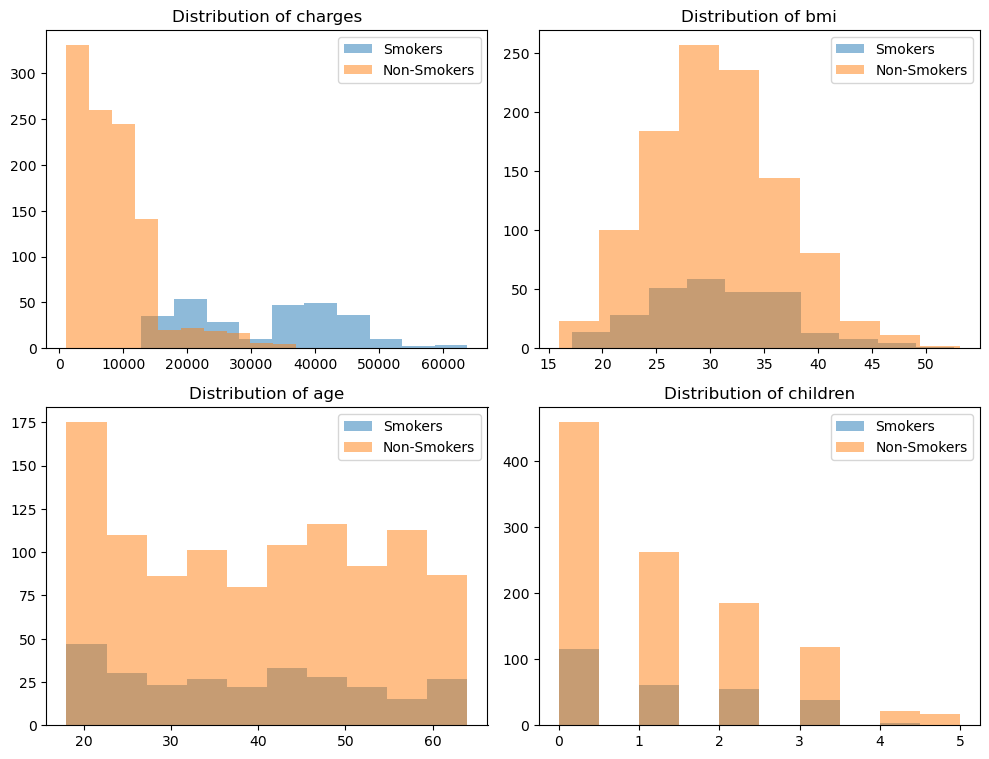

In [9]:
numerical_features = ['charges', 'bmi', 'age', 'children']
subplot_number = 421
fig = plt.figure(figsize=(10, 15))

for f in numerical_features:
    ax = fig.add_subplot(subplot_number)
    ax.hist(smokers[f], alpha=0.5, label='Smokers')
    ax.hist(non_smokers[f], alpha=0.5, label='Non-Smokers')
    ax.set_title(f'Distribution of {f}')
    ax.legend()
    subplot_number += 1

plt.tight_layout()
plt.show()

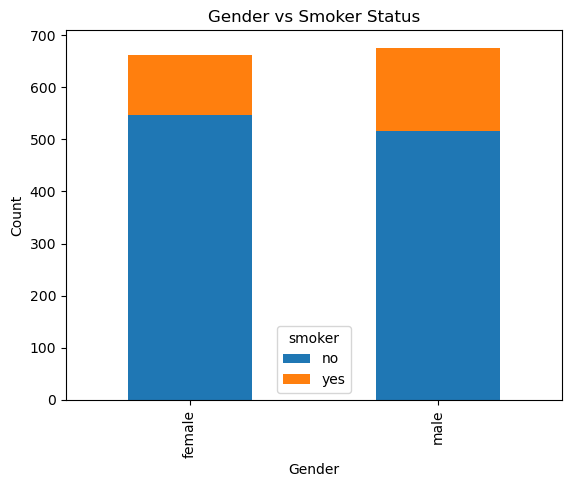

In [10]:
# Gender vs Smoker status
gender_smoker_counts = df.groupby(['sex', 'smoker']).size().unstack()
gender_smoker_counts.plot(kind='bar', stacked=True)
plt.title('Gender vs Smoker Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

In [13]:
# Replace sex and smoker columns
df['sex'] = df['sex'].map({'female': 1, 'male': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Check the changes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [14]:
# Replace region column
regions = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
df['region'] = df['region'].map(regions)

# Check the changes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [15]:
# Normalize the data
df = df / df.max()

In [16]:
# Split the data into training and testing sets
X = df.drop('smoker', axis=1)
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)



# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[200   2]
 [ 25  40]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       202
         1.0       0.95      0.62      0.75        65

    accuracy                           0.90       267
   macro avg       0.92      0.80      0.84       267
weighted avg       0.90      0.90      0.89       267



In [18]:
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model with increased max_iter and a different solver
model = LogisticRegression(max_iter=200, solver='liblinear')  # or 'saga'
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       202
         1.0       0.95      0.97      0.96        65

    accuracy                           0.98       267
   macro avg       0.97      0.98      0.97       267
weighted avg       0.98      0.98      0.98       267

[[199   3]
 [  2  63]]
